https://www.zoopla.co.uk/to-rent/property/london/clapham/?identifier=london%2Fclapham&furnished_state=unfurnished&include_shared_accommodation=false&page_size=100&q=Clapham%2C%20London&search_source=refine&radius=1&price_frequency=per_month&pn=1

furnished_state = unfurnished/furnished
include_shared_accomodation = false/true
price_frequency = per_month /per_week
q - location. 
restults_sort = newest_listings
radius - 1 mile
page_size = number of results per page - 10,25,50,100

In [370]:
import urllib.request 
from bs4 import BeautifulSoup
import pandas as pd
import time
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [673]:
#Regex formula to find and separate the monthly cost in form of a number - 
#eliminate pound sign, comma and the weekly cost in parenthesis

reg = re.compile(r'£([0-9]{0,2}),?([0-9]{1,3}) \w+')
rent=[]
bedrooms=[]
bathrooms = []
receptions = []
link=[]
description=[]
location=[]
available=[]


for i in range(1,50):
    page_link='https://www.zoopla.co.uk/to-rent/property/london/clapham/?identifier=london%2Fclapham&furnished_state=unfurnished&include_shared_accommodation=false&page_size=100&q=Clapham%2C%20London&search_source=refine&radius=3&price_frequency=per_month&pn={}'.format(i)
    page = urllib.request.urlopen(page_link)
    soup = BeautifulSoup(page, 'html.parser')
    print('Page '+str(i)+' done')
    
    try:
        listing = soup.find('ul', {'class': 'listing-results clearfix js-gtm-list'}).findAll('div', {'class':'listing-results-right clearfix'})
        for flat in listing:
            #Using regex to select monthly rent and appending it to rent list
            try:
                res = reg.search(flat.find('a', {'class':'listing-results-price text-price'}).text.strip())
                rent.append(int(res.group(1)+res.group(2)))
            except:
                rent.append(None)
            #Finding number of bedrooms in specific span and appending to list
            try:
                bedrooms.append(int(flat.find('span', {'class':'num-icon num-beds'}).text.strip()))
            except:
                bedrooms.append(None)
            #Finding number of bathroom in span and appending to list
            try:
                bathrooms.append(int(flat.find('span', {'class':'num-icon num-baths'}).text.strip()))
            except:
                bathrooms.append(None)
            #Finding number of reception rooms and appending to list:
            try:
                receptions.append(int(flat.find('span', {'class':'num-icon num-reception'}).text.strip()))
            except:
                receptions.append(None)
            #Finding link and flat description:
            link.append('https://www.zoopla.co.uk'+flat.find('h2').find('a')['href'])
        
            description.append(flat.find('h2').find('a').text.strip())
        
            #Location:
            try:
                location.append(flat.findAll('span', {'class': None})[-1].text.strip())
            except:
                location.append(None)
            #Available:
            try:
                available.append(flat.find('p', {'class':'available-from'}).text.strip())
            except:
                available.append(None)
        time.sleep(1)
    except:
        break

Page 1 done
Page 2 done
Page 3 done
Page 4 done
Page 5 done
Page 6 done
Page 7 done
Page 8 done
Page 9 done
Page 10 done
Page 11 done
Page 12 done
Page 13 done
Page 14 done
Page 15 done
Page 16 done
Page 17 done
Page 18 done
Page 19 done
Page 20 done
Page 21 done
Page 22 done
Page 23 done
Page 24 done
Page 25 done
Page 26 done
Page 27 done
Page 28 done
Page 29 done
Page 30 done
Page 31 done
Page 32 done
Page 33 done
Page 34 done
Page 35 done
Page 36 done
Page 37 done
Page 38 done
Page 39 done
Page 40 done
Page 41 done
Page 42 done
Page 43 done
Page 44 done
Page 45 done
Page 46 done
Page 47 done
Page 48 done
Page 49 done


In [674]:
df = pd.DataFrame({'Rent':rent,
                  'Bedrooms': bedrooms,
                  'Bathrooms': bathrooms,
                  'Receptions': receptions,
                  'Description': description,
                  'Location': location,
                  'Available': available,
                  'Link': link})

In [675]:
df.to_csv('clapham.csv', index=False)

In [676]:
df = pd.read_csv('clapham.csv')

In [677]:
df.head()

,Rent,Bedrooms,Bathrooms,Receptions,Description,Location,Available,Link
0,1300.0,1.0,1.0,1.0,1 bed flat to rent,"Christchurch Road, London SW2",Available immediately,https://www.zoopla.co.uk/to-rent/details/50391654
1,3207.0,1.0,NaN,NaN,1 bed flat to rent,"Hill Street, Mayfair, London W1J",Available from 6th Feb 2019,https://www.zoopla.co.uk/to-rent/details/50391591
2,4160.0,2.0,NaN,NaN,2 bed flat to rent,"Hill Street, Mayfair, London W1J",Available immediately,https://www.zoopla.co.uk/to-rent/details/50391592
3,4182.0,2.0,NaN,NaN,2 bed flat to rent,"Hill Street, Mayfair, London W1J",Available immediately,https://www.zoopla.co.uk/to-rent/details/50391593
4,3207.0,1.0,NaN,NaN,1 bed flat to rent,"Hill Street, Mayfair, London W1J",Available immediately,https://www.zoopla.co.uk/to-rent/details/50391557


In [678]:
df.describe()

,Rent,Bedrooms,Bathrooms,Receptions
count,4584.000000,4397.000000,3801.000000,3135.000000
mean,5032.415140,2.307710,1.790845,1.193620
std,7344.289886,1.239393,0.992700,0.516317
min,87.000000,1.000000,1.000000,1.000000
25%,2000.000000,2.000000,1.000000,1.000000
50%,3207.000000,2.000000,2.000000,1.000000
75%,4767.000000,3.000000,2.000000,1.000000
max,86667.000000,28.000000,10.000000,6.000000


In [679]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4587 entries, 0 to 4586
Data columns (total 8 columns):
Rent           4584 non-null float64
Bedrooms       4397 non-null float64
Bathrooms      3801 non-null float64
Receptions     3135 non-null float64
Description    4587 non-null object
Location       4587 non-null object
Available      3504 non-null object
Link           4587 non-null object
dtypes: float64(4), object(4)
memory usage: 286.8+ KB


In [680]:
df.isnull()

,Rent,Bedrooms,Bathrooms,Receptions,Description,Location,Available,Link
0,False,False,False,False,False,False,False,False
1,False,False,True,True,False,False,False,False
2,False,False,True,True,False,False,False,False
3,False,False,True,True,False,False,False,False
4,False,False,True,True,False,False,False,False
5,False,False,True,True,False,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,True,False
9,False,False,False,False,False,False,True,False


Some listings missing number of bedrooms/bathrooms/receptions - the information is the description but isn't visible from the main page.

/Users/jankierzyk/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/jankierzyk/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


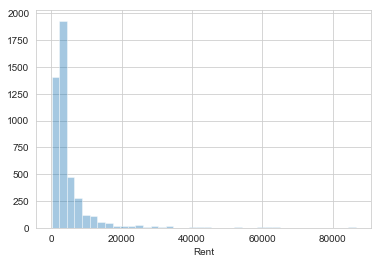

In [681]:
sns.distplot(df['Rent'], kde=False, bins=40)

In [682]:
df.Rent.describe()

count     4584.000000
mean      5032.415140
std       7344.289886
min         87.000000
25%       2000.000000
50%       3207.000000
75%       4767.000000
max      86667.000000
Name: Rent, dtype: float64

Max of over 20 000 a month looks like an outlier - it's worth getting rid of. To make data easier to work with let's set upper limit to £5000.

In [683]:
df=df[df['Rent']<5000]

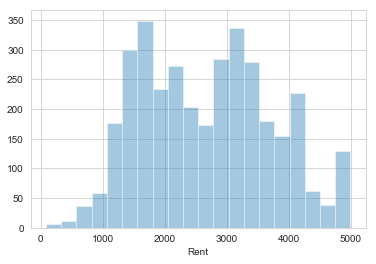

In [684]:
sns.set_style('whitegrid')
sns.distplot(df['Rent'], kde=False, bins=20)

Looks like a binormal distribution with average around 1800-1900 and 3200. Most listings fall between £1000-£5000 a month.

In [686]:
df=df[df['Bedrooms']<5] #Removing listings with more than 4 bedrooms

In [695]:
df.groupby('Bedrooms')['Bathrooms'].mean()

Bedrooms
1.0    1.023684
2.0    1.562542
3.0    1.668750
4.0    2.075862
Name: Bathrooms, dtype: float64

In [485]:
#Filling missing values with mean (for calculations only)
#df['Bathrooms']=df['Bathrooms'].fillna(int(df['Bathrooms'].mean()))

In [486]:
#df['Receptions']=df['Receptions'].fillna(int(df['Bathrooms'].mean()))

In [487]:
#df['Bedrooms'] = df['Bedrooms'].fillna(int(df['Bedrooms'].mean()))

In [707]:
df.dropna(inplace=True)

In [708]:
df.groupby(['Bedrooms', 'Bathrooms'])['Rent'].mean()

Bedrooms  Bathrooms
1.0       1.0          2350.864440
          2.0          3148.846154
2.0       1.0          2431.891509
          2.0          3385.365631
          3.0          2667.000000
3.0       1.0          2140.373626
          2.0          3266.366972
          3.0          3842.750000
          4.0          2650.000000
4.0       1.0          2497.533333
          2.0          3400.285714
          3.0          3776.800000
          4.0          4008.500000
Name: Rent, dtype: float64

### How number of bedrooms and bathrooms influences the rent price

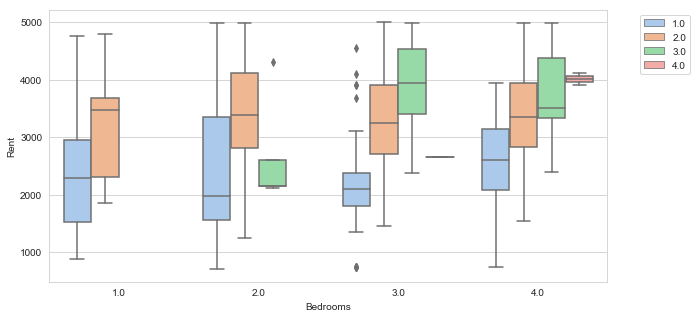

In [730]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Bedrooms', y='Rent', data=df, hue='Bathrooms', palette='pastel')
plt.legend(loc=2, bbox_to_anchor=(1.05, 1));

### How number of receptions influences the rent price

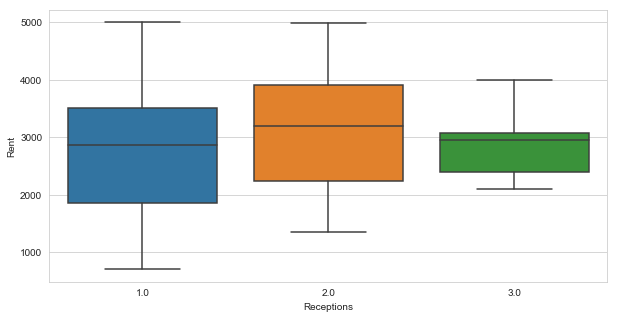

In [734]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Receptions', y='Rent',data=df)

In [744]:
df.Location.describe()

count                        1810
unique                       1107
top       Hill Street, London W1J
freq                           97
Name: Location, dtype: object

## Best way would be to fill the missing values with means for specific number of bedrooms - can't figure out how.

In [745]:
from sklearn.linear_model import LinearRegression

In [746]:
lr = LinearRegression()

In [747]:
from sklearn.model_selection import train_test_split

In [748]:
df.columns

Index(['Rent', 'Bedrooms', 'Bathrooms', 'Receptions', 'Description',
       'Location', 'Available', 'Link'],
      dtype='object')

In [749]:
X = df[['Bedrooms', 'Bathrooms', 'Receptions']]
y=df['Rent']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [750]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [751]:
predict = lr.predict(X_test)

In [752]:
from sklearn.metrics import classification_report

In [753]:
lr.coef_

array([-38.30982961, 916.52123361,  74.59851493])

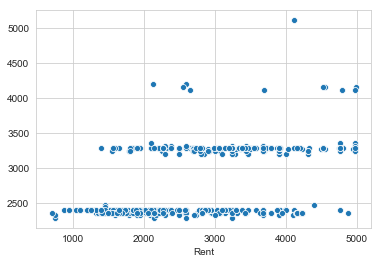

In [754]:
sns.scatterplot(y_test, predict)

In [755]:
#Mean Absolute Error
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, predict)

764.5329765200711

In [756]:
#Mean Squared Error
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, predict)

836738.8014141419

In [759]:
#Root Mean Squared Error
np.sqrt(mean_squared_error(y_test, predict))

914.7342791292682

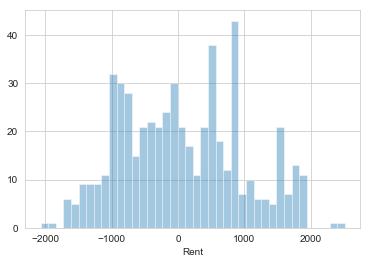

In [758]:
sns.distplot(y_test - predict, bins=40, kde=False)

In [661]:
pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])

,Coefficient
Bedrooms,-44.737395
Bathrooms,903.232070
Receptions,174.413947


## To do: 
- fill missing values with means for specific number of bedrooms
- use description to put in categories - house, flat, etc
- check other areas, compare them
